# Fabry Perot Linear Analysis

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import gridspec
from scipy.optimize import curve_fit

%matplotlib inline

In [5]:
class initialCleanUp:
    """ Cleaning up of the raw oscilliscope data. """
    def __init__(self, dataset):
        self.dataset = dataset
    
    def removeColsAndRows(self, dataStartRow):

        """
        Remove columns and rows that aren't useful for
        plotting.
        DataStartRow is the row where the data starts in the file.
        """

        self.dataset.drop(self.dataset.columns[[2]], axis=1, inplace=True)


        self.dataset = self.dataset.drop(labels=range(0, dataStartRow), axis=0)

        return self.dataset
    
class findPeaks:
    """ Finding the peaks of a panda dataset. """
    def __init__(self, data):
        self.data = data
    
    def max(self):
        """ 
        Find the maximum values and all of its corresponding row values.
        The twenty is so the values are off the exact peak by a little,
        it was suggested this would be a good step.
        """
        max_index = self.data.y.argmax()
        y_position_max = self.data.iloc[max_index+40, 0:2]
        return y_position_max
    
    def min(self):
        """ 
        Find the minimum values and all of its corresponding row values.
        The twenty is so the values are off the exact peak by a little,
        it was suggested this would be a good step.
        """
        min_index = self.data.y.argmin()
        y_position_min = self.data.iloc[min_index-40, 0:2]
        return y_position_min
        

# Importing and cleaning the raw data from the oscilloscope

Text(0.5, 1.0, 'A Plot of the raw fabry perot data.')

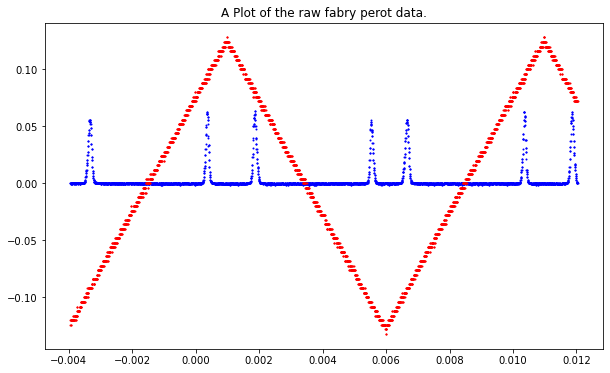

In [3]:
# Get the raw data from the oscilloscopes output
rawFabryPerotData = pd.read_csv('/Users/starman/Desktop/PycharmProjects-fall-2021/'
                      'phy445-Lab1-FINAL/Data/fabry-perot-baseline/'
                      'A0001CH2.CSV')

rawTriangleWaveData = pd.read_csv('/Users/starman/Desktop/PycharmProjects-fall-2021/'
                      'phy445-Lab1-FINAL/Data/fabry-perot-baseline/'
                      'A0001CH1.CSV')


rawCopiedFabryPerotData = rawFabryPerotData.copy()
rawCopiedTriangleWaveData = rawTriangleWaveData.copy()


dataStart = 17

# Clear the unnessecary rows and columns from the raw data
cleanedUpFabryPerotData = initialCleanUp(rawCopiedFabryPerotData).removeColsAndRows(dataStart)
cleanedUpFabryPerotData.columns = ['x', 'y']
cleanedUpFabryPerotData = cleanedUpFabryPerotData.astype(float)


cleanedUpTriangleWaveData = initialCleanUp(rawCopiedTriangleWaveData).removeColsAndRows(dataStart)
cleanedUpTriangleWaveData.columns = ['x', 'y']
cleanedUpTriangleWaveData = cleanedUpTriangleWaveData.astype(float)

# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])


ax1.scatter(cleanedUpFabryPerotData['x'], cleanedUpFabryPerotData['y'], c='blue', s=1)
ax1.scatter(cleanedUpTriangleWaveData['x'], cleanedUpTriangleWaveData['y'], c='red', s=1)


plt.title("A Plot of the raw fabry perot data.")


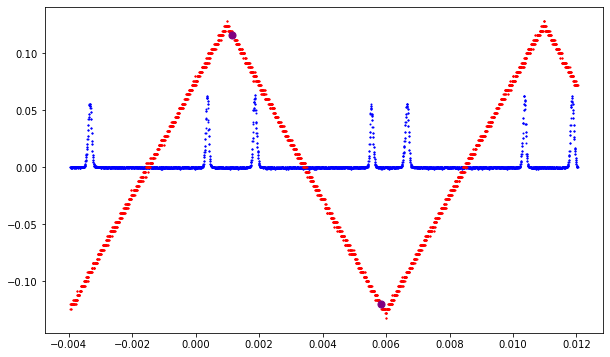

In [6]:
y_max_position = findPeaks(cleanedUpTriangleWaveData).max()
y_min_position = findPeaks(cleanedUpTriangleWaveData).min()

# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.scatter(cleanedUpFabryPerotData['x'], cleanedUpFabryPerotData['y'], c='blue', s=1)
ax1.scatter(cleanedUpTriangleWaveData['x'], cleanedUpTriangleWaveData['y'], c='red', s=1)

ax1.scatter(y_min_position[0], y_min_position[1], s=50, c='purple')
ax1.scatter(y_max_position[0], y_max_position[1], s=50, c='purple')

# Chopping off ends of the data

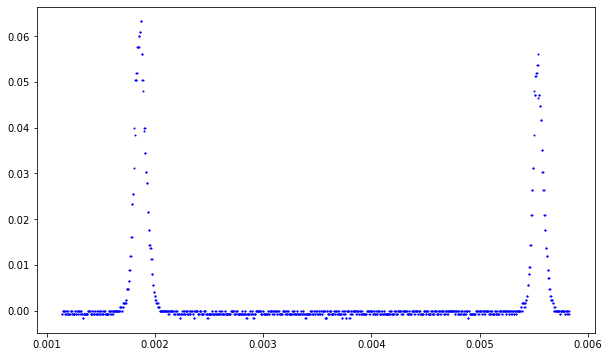

In [7]:
choppedOffFabryPerotData = cleanedUpFabryPerotData.loc[(cleanedUpFabryPerotData.x >= y_max_position[0]) &
                                                      (cleanedUpFabryPerotData.x <= y_min_position[0])]


# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.scatter(choppedOffFabryPerotData['x'], choppedOffFabryPerotData['y'], s=1, c='blue')

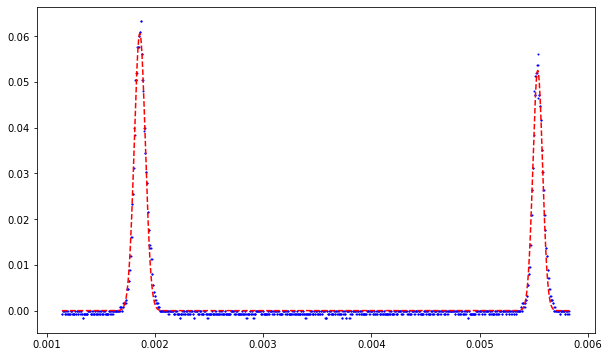

In [17]:
def twoGaussian(x, amp1,cen1,sig1, amp2,cen2,sig2):
    return (amp1*(1/(sig1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sig1)**2.0))) +
            amp2*(1/(sig2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen2)/sig2)**2.0))))

guess = [0.1,0.0018,1e-5, 0.1,0.0056,1e-5]

fitParameters, fitCov = curve_fit(f = twoGaussian,
                                 xdata = choppedOffFabryPerotData['x'],
                                 ydata = choppedOffFabryPerotData['y'],
                                 p0 = guess)


ampl1, cent1, sigm1 = fitParameters[0], fitParameters[1], fitParameters[2]
ampl2, cent2, sigm2 = fitParameters[3], fitParameters[4], fitParameters[5]

outputValues = [twoGaussian(i, ampl1,cent1,sigm1, ampl2,cent2,sigm2) for i in choppedOffFabryPerotData['x']]

# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.scatter(choppedOffFabryPerotData['x'], choppedOffFabryPerotData['y'], s=1, c='blue')
ax1.plot(choppedOffFabryPerotData['x'], outputValues, '--', c='red')

# Distance between the peaks

In [20]:
distanceBetween = cent2 - cent1
print('Distance Between:', distanceBetween)

print('conversion factor (s/GHz):', distanceBetween/10)

Distance Between: 0.0036774954107929667
conversion factor (s/GHz): 0.00036774954107929666
